# Принятие решений в бизнесе. A/B-тестирование гипотез для увеличения выручки интернет-магазина 

#### Краткое описание проекта

**Описание проекта:**
Аналитик крупного интернет-магазина вместе с отделом маркетинга подготовили список гипотез для увеличения выручки.  

**Цель:**
Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.  

**Ход исследования:**
1. Подготовка данных к анализу (загрузка данных и предобработка данных):
- загрузка  и изучение предоставленных данных на наличиче пропусков, дубликатов, соответствие типам данных.
- корректировка типа данных.
2. Приоритизация гипотез:
- Применение фреймворк ICE для приоритизации гипотез. Сортировка их по убыванию приоритета.
- Применение фреймворк RICE для приоритизации гипотез. Сортировка их по убыванию приоритета.
- Анализ и описание причин изменений приоритизация гипотез при применении RICE вместо ICE.
3. Анализ A/B-теста. 
- Сделаем выводы и предположения по графикам:
    - кумулятивной выручки по группам.
    - кумулятивного среднего чека по группам.
    - относительного изменения кумулятивного среднего чека группы B к группе A.
    - кумулятивного среднего количества заказов на посетителя по группам.
    - относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
- Проанализаруем аномалии по:
    - точечным графикам количества заказов по пользователям и стоимостей заказов.
    - посчитаем 95-й и 99-й перцентили количества заказов на пользователя и стоимости заказов.
    - выберем границы для определения аномальных пользователей.
- Посчитаем статистические значимости различий между группами по «сырым» данным:
    - в среднем количестве заказов на посетителя.
    - в среднем чеке заказа. 
- Посчитаем статистические значимости различий  между группами по «очищенным» данным: 
    - в среднем количестве заказов на посетителя.
    - в среднем чеке заказа.
- Примем решение по результатам теста и объясните его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

**Общий вывод:**
Приоритизирование гипотез и анализ A/B-теста позволит подготовить список гипотез, которые увеличат выручки компании.

In [1]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats as st
from pandas.plotting import register_matplotlib_converters

#### Приоритизация гипотез.

##### Загрузка датафрайма с гипотезами:

Преобразуем в относительный путь относительно текущей директории

In [2]:
absolute_path1 = '/datasets/hypothesis.csv' # Абсолютный путь

relative_path1 = os.path.relpath(absolute_path1)
#print(f"Относительный путь: {relative_path}")

pth1_1 = 'https://code.s3.yandex.net/datasets/hypothesis.csv'
pth1_2 = relative_path1

if os.path.exists(pth1_1):
    query_1 = pd.read_csv(pth1_1)
elif os.path.exists(pth1_2):
    query_1 = pd.read_csv(pth1_2)
else:
    print('Something is wrong')

In [3]:
hyp_df = query_1
pd.set_option('display.max_colwidth', None)
hyp_df

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Приведем в соответствие название столбцов стилю snake_case:

In [4]:
hyp_df.columns = hyp_df.columns.str.lower()

In [5]:
hyp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
hyp_df.describe().round()

,reach,impact,confidence,efforts
count,9.0,9.0,9.0,9.0
mean,5.0,5.0,6.0,5.0
std,3.0,3.0,3.0,3.0
min,1.0,1.0,1.0,1.0
25%,3.0,3.0,3.0,3.0
50%,3.0,3.0,7.0,5.0
75%,8.0,7.0,8.0,6.0
max,10.0,10.0,9.0,10.0


###### Выводы:

- Датафрайм hypothesis.csv содержит 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами по 10-балльной шкале:
    - Reach (охват пользователей), 
    - Impact (влияние на пользователей), 
    - Confidence (уверенность в гипотезе), 
    - Effort (затраты ресурсов на проверку гипотезы).

- Данные имеют подходящие типы: описанные гипотезы - тип `object`, балы - тип `int64`.
- Пропусков в баллах нет.
- Название столбцов приведены в соответствие со стилем snake_case. 

#####  Применение фреймворк ICE для приоритизации гипотез

In [7]:
hyp_df['ICE'] = (hyp_df['impact']*hyp_df['confidence'])/hyp_df['efforts']
hyp_ice = hyp_df[['hypothesis', 'ICE']].round(1).sort_values(by='ICE',ascending=False)
hyp_ice

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


#####  Применение фреймворк RICE для приоритизации гипотез

In [8]:
hyp_df['RICE'] = (hyp_df['reach']*hyp_df['impact']*hyp_df['confidence'])/hyp_df['efforts']

hyp_rice = hyp_df[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
hyp_rice

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


##### Анализ и описание причин изменений приоритизация гипотез при применении RICE вместо ICE

- Без учета баллов по охвату пользователей (фреймворк ICE) приоритетными становятся №8, №0 и №7.
- При использовании фреймворка RICE, т.е при учете баллов по охвату пользователей, приоритетными становятся №7, №2, №0 и №6 гипотезы.
- Гипотеза №7 стала лидером (при использовании фреймворка RICE показателей равен 112, что превышает почти в два раза следующий за ним показатель гипотезы №2, равный 56). Это связано стем, что гипотеза №7 имеет максимальный балл (10) по охвату пользователей, среду других гипотез.
- По этой же причине и гипотеза №2 стала более приоритетной, т.к бал охвата пользователей равен 8.
- При этом, бал охвата пользователей гипотезы №8 равен только 3, что и привело к снижению его приоритизации.
- В целом, приоритетными можно считать следующие гипотезы:
    - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (№7).
    - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (№2).
    - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (№0).
    - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (№6).

#### Анализ A/B-теста

##### Загрузка датафреймов для проведения анализа A/B-теста

###### Данные о заказах:

Преобразуем в относительный путь относительно текущей директории:

In [9]:
absolute_path2 = '/datasets/orders.csv' # Абсолютный путь

relative_path2 = os.path.relpath(absolute_path2)
#print(f"Относительный путь: {relative_path2}")

pth2_1 = 'https://code.s3.yandex.net/datasets/orders.csv'
pth2_2 = relative_path2

if os.path.exists(pth2_1):
    query_2 = pd.read_csv(pth2_1)
elif os.path.exists(pth2_2):
    query_2 = pd.read_csv(pth2_2)
else:
    print('Something is wrong')

In [10]:
orders_df = query_2
orders_df.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Приведем в соответствие название столбцов стилю snake_case:

In [11]:
orders_df.columns = orders_df.columns.str.replace('Id', '_id')

In [12]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Изменим тип данных у даты на "datetime64[ns]":

In [13]:
orders_df['date'] = orders_df['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Проверим на наличие пустых значений и явных дубликатов:

In [14]:
orders_df.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [15]:
orders_df.duplicated().sum()

0

###### Данные о A/B группах пользователей:

Преобразуем в относительный путь относительно текущей директории

In [16]:
absolute_path3 = '/datasets/visitors.csv' # Абсолютный путь

relative_path3 = os.path.relpath(absolute_path3)
#print(f"Относительный путь: {relative_path3}")

pth3_1 = 'https://code.s3.yandex.net/datasets/visitors.csv'
pth3_2 = relative_path3

if os.path.exists(pth3_1):
    query_3 = pd.read_csv(pth3_1)
elif os.path.exists(pth3_2):
    query_3 = pd.read_csv(pth3_2)
else:
    print('Something is wrong')

In [17]:
visitors_df = query_3
visitors_df.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [18]:
visitors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Изменим тип данных у даты на "datetime64[ns]":

In [19]:
visitors_df['date'] = visitors_df['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверим на наличие пустых значений:

In [20]:
visitors_df.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [21]:
visitors_df.duplicated().sum()

0

In [22]:
visitors_df['date'].unique()

array(['2019-08-01T00:00:00.000000000', '2019-08-02T00:00:00.000000000',
       '2019-08-03T00:00:00.000000000', '2019-08-04T00:00:00.000000000',
       '2019-08-05T00:00:00.000000000', '2019-08-06T00:00:00.000000000',
       '2019-08-07T00:00:00.000000000', '2019-08-08T00:00:00.000000000',
       '2019-08-09T00:00:00.000000000', '2019-08-10T00:00:00.000000000',
       '2019-08-11T00:00:00.000000000', '2019-08-12T00:00:00.000000000',
       '2019-08-13T00:00:00.000000000', '2019-08-14T00:00:00.000000000',
       '2019-08-15T00:00:00.000000000', '2019-08-16T00:00:00.000000000',
       '2019-08-17T00:00:00.000000000', '2019-08-18T00:00:00.000000000',
       '2019-08-19T00:00:00.000000000', '2019-08-20T00:00:00.000000000',
       '2019-08-21T00:00:00.000000000', '2019-08-22T00:00:00.000000000',
       '2019-08-23T00:00:00.000000000', '2019-08-24T00:00:00.000000000',
       '2019-08-25T00:00:00.000000000', '2019-08-26T00:00:00.000000000',
       '2019-08-27T00:00:00.000000000', '2019-08-28

###### Выводы:

- Датафрейм о заказах имеет 1197 наблюдений и включает следующие параметры:
    - transaction_id (идентификатор заказа);
    - visitor_id (идентификатор пользователя, совершившего заказ);
    - date (дата, когда был совершён заказ);
    - revenue (выручка заказа);
    - group (группа A/B-теста, в которую попал заказ).
- Датафрейм о A/B группа включает данные, сгруппированные по дате совершения заказа. Представлены данные за август 2019 года.
- Датафреймы связан между собой по дате совершения заказа.
- Данные имеют подходящие типы, в том числе даты переведены в формат `datetime64[ns]`.
- Пропусков и явных дубликатов в данных не выявлено.

##### Проверка корректность распределения на группы

In [23]:
display('Кол-во посетителей гр."А": {}'.format(visitors_df[visitors_df['group']=='A']['visitors'].sum()))
display('Кол-во посетителей гр."B": {}'.format(visitors_df[visitors_df['group']=='B']['visitors'].sum()))
display('Кол-во покупок в гр."A": {}'.format(len(orders_df[orders_df['group']=='A'])))
display('Кол-во покупок в гр."B": {}'.format(len(orders_df[orders_df['group']=='B'])))

'Кол-во посетителей гр."А": 18736'

'Кол-во посетителей гр."B": 18916'

'Кол-во покупок в гр."A": 557'

'Кол-во покупок в гр."B": 640'

Непараметрический тест Уилкоксона-Манна-Уитни:

In [24]:
alpha = 0.05
results = st.mannwhitneyu(
    visitors_df[visitors_df['group']=='A']['visitors'], 
    visitors_df[visitors_df['group']=='B']['visitors'], 
    True, 
    'less')

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Разница в кол-ве посетителей в группах "А" и "В" статистически значима.') 
else:
    print(
        'Разница в кол-ве посетителей в группах "А" и "В" статистически не значима.')

p-значение:  0.36506882746952496
Разница в кол-ве посетителей в группах "А" и "В" статистически не значима.


In [25]:
start_conv = len(orders_df[orders_df['group']=='A']) / visitors_df[visitors_df['group']=='A']['visitors'].sum()
modif_conv = len(orders_df[orders_df['group']=='B']) / visitors_df[visitors_df['group']=='B']['visitors'].sum()
shape_conv = abs(1-(start_conv/modif_conv))

display('Начальная конверсия: {:.3f}'.format(start_conv))
display('Конверсия после изменений: {:.3f}'.format(modif_conv))
display('Относительное изменение конверсий: {:.3f}'.format(shape_conv))
display('Общее количество пользователей: {:.0f}'.format(visitors_df['visitors'].sum()))

'Начальная конверсия: 0.030'

'Конверсия после изменений: 0.034'

'Относительное изменение конверсий: 0.121'

'Общее количество пользователей: 37652'

###### Выводы:

- Согласно тесту Уилкоксона-Манна-Уитни, разница в количестве посетителей в группах "А" и "В" статистически не значима.
- Используя полученные данные о конверсиях, а также согласно расчетам на калькуляторе https://www.evanmiller.org/ab-testing/sample-size.html, для проведения АВ-теста необходимо 35855 наблюдений. В изучаемых данных 37652 наблюдений.

##### Анализ кумулятивных метрик

###### Расчет кумулятивных метрик:

Создадим датафрейм `datesGroups` с уникальными парами значений дат и групп теста, таблицы orders. Избавимся от дубликатов методом drop_duplicates().

In [26]:
datesGroups = orders_df[['date', 'group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [27]:
datesGroups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 1150
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.5+ KB


Получим агрегированные кумулятивные по дням данные о заказах:

In [28]:
ordersAggregated = datesGroups.apply(
    lambda x: orders_df[np.logical_and(orders_df['date'] <= x['date'], 
                                       orders_df['group'] == x['group'])]\
    .agg({
        'date' : 'max',
        'group' : 'max',
        'transaction_id' : pd.Series.nunique,
        'visitor_id' : pd.Series.nunique,
        'revenue' : 'sum'}),
    axis=1)\
.sort_values(by=['date','group'])

Получим агрегированные кумулятивные о посетителях интернет-магазина:

In [29]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors_df[np.logical_and(visitors_df['date'] <= x['date'],
                                      visitors_df['group'] == x['group'])]\
    .agg({
        'date' : 'max',
        'group' : 'max',
        'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

Объединим кумулятивные данные в одной таблице:

In [30]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, 
                                        left_on=['date', 'group'], 
                                        right_on=['date', 'group'])
cumulativeData.columns = ['date', 
                          'group', 
                          'orders', 
                          'buyers', 
                          'revenue', 
                          'visitors']

Проверим корректность созданного датафрейма:

In [31]:
order_data_min = orders_df['date'].min()
order_data_max = orders_df['date'].max()

cumulative_data_min = cumulativeData['date'].min()
cumulative_data_max = cumulativeData['date'].max()

if order_data_min == cumulative_data_min and order_data_max == cumulative_data_max:
    print('Данные для кумулятивного датафрейма выбраны корректно.') 
else:
    print(
        'Ошибка при фильтрации или агрегации данных.')

Данные для кумулятивного датафрейма выбраны корректно.


Сохраним данные о датах, выручке и числе заказов в группах A и B:

In [32]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

###### Кумулятивная выручка по группам

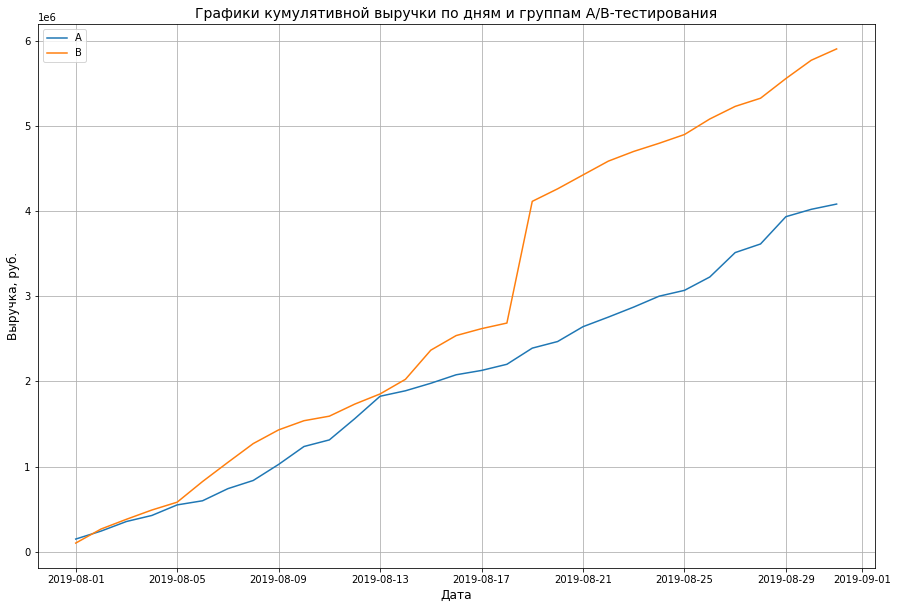

In [33]:
plt.figure(figsize=(15, 10))
plt.plot(cumulativeRevenueA['date'], 
         cumulativeRevenueA['revenue'], 
         label='A');
plt.plot(cumulativeRevenueB['date'], 
         cumulativeRevenueB['revenue'], 
         label='B')

plt.grid(visible=True)
plt.title('Графики кумулятивной выручки по дням и группам A/B-тестирования', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Выручка, руб.', fontsize=12)
plt.legend() 
plt.show()

Вывод:

- До середины августа выручка увеличивалась в обеих группа равномерно.
- С середины исследуемого периода (примерно 18-19 августа) выручка в группе "В" резко увеличилась.
- При этом, динамика увеличения в обеих группах схожа, даже после "скачка" в гр."В".
- Также  незначительный скачок виден на графике группы "А" 13 августа.

В целом, "скачки" выручки могут быть связаны с увеличением числа покупок и/или крупными покупками. 

###### Средний чек по группам

Построим графики кумулятивного среднего чека: 

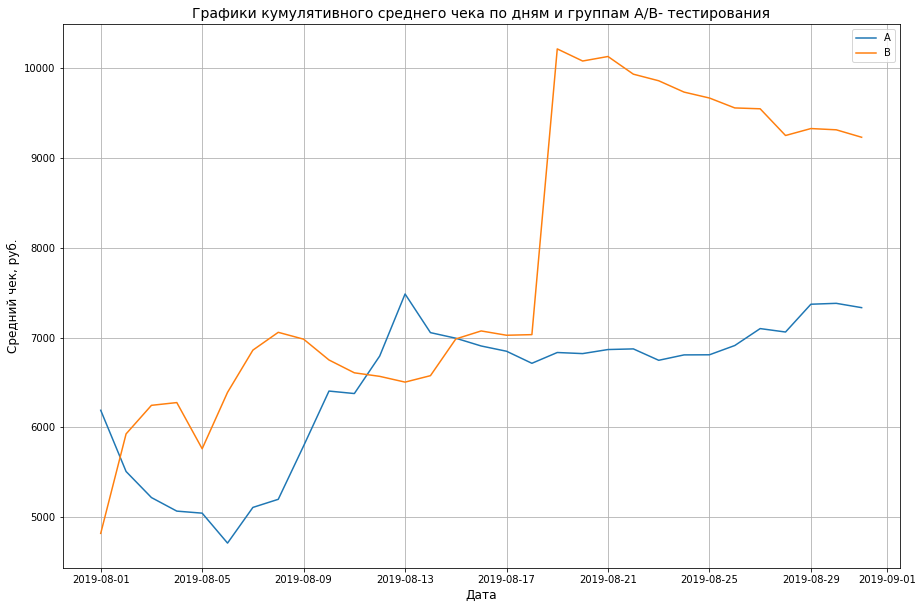

In [34]:
plt.figure(figsize=(15, 10))
plt.plot(cumulativeRevenueA['date'], 
         cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], 
         label='A')
plt.plot(cumulativeRevenueB['date'], 
         cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], 
         label='B')

plt.grid(visible=True)
plt.title('Графики кумулятивного среднего чека по дням и группам A/B- тестирования', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Средний чек, руб.', fontsize=12)
plt.legend() 
plt.show();

Вывод:

- Группа "А":
    - В первые 6 дней исследуемого периода наблюдается снижение среднего чека (примерно с 6,2 тыс.руб. до 4,7 тыс.руб.)
    - При этом с 6 по 13 августа показатель кумулятивного среднего чека в данной группе резко вырос.
    - Однако достигнув пика (на отметке около 7,5 тыс.руб.) данная метрика немного снизилась и в на протяжении оставшегося исследуемого периода незначительно колебалась в районе 7 тыс.руб. 
    - После "скачка" среднего чека в группе "А" после 13 августа, показатели несколько снижаются, но затем выравниваются и становятся более равномерными. 
- Группа "В":
    - В первой половине исследуемого периода средний чек в данной группе волнообразно подрастал, при этом темпы роста были выше, чем снижения, поэтому в целом данная метрика увеличивалась (примерно от 5 тыс.руб. до 7 тыс.руб).
    - С середины исследуемого периода (примерно 18-19 августа) средний чек в группе "В" резко увеличился (достигнув отметки более 10 тыс.руб.).
    - Однако, после достижения пика показатель среднего чека незначительно снизился (примерно до 9,2 тыс.руб), при этом динамика была планомерной, без "скачков".
    
В целом, "скачки" среднего чека, также как и выручки, могут быть связаны с увеличением числа покупок и/или крупными покупками. Однако резкость таких "скачков" может быть связана  аномальным поведением пользователей (большими заказами или очень дорогими покупками).

###### Относительное изменение кумулятивного среднего чека группы "B" к группе "A". 

Объединим кумулятивные данные в одной таблице: 

In [35]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B'])

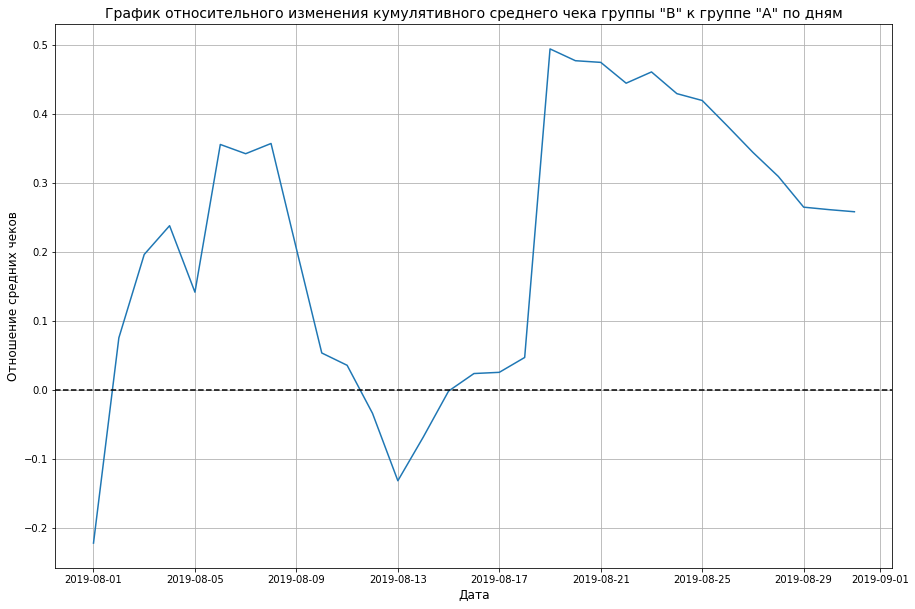

In [36]:
plt.figure(figsize=(15, 10))
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/
          mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/
          mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.grid(visible=True)
plt.title('График относительного изменения кумулятивного среднего чека группы "В" к группе "А" по дням', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение средних чеков', fontsize=12) 
plt.show();

Вывод:

- Резкое повышение среднего чека может говорить о наличии аномально больших или малых заказов и других "выбросах".
- В целом, график расположен выше нуля, что может свидетельствовать о частом превышении среднего чека в группе В относительно среднего чека в группе А.
- После резкого "скачка", в последней трети, график становится более стабильным, что может указывать на выравнивание кумулятивного среднего чека. 

###### Кумулятивная конверсия по группам

Посчитаем среднее количество заказов на посетителя:

In [37]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

Отделим данные по группам:

In [38]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

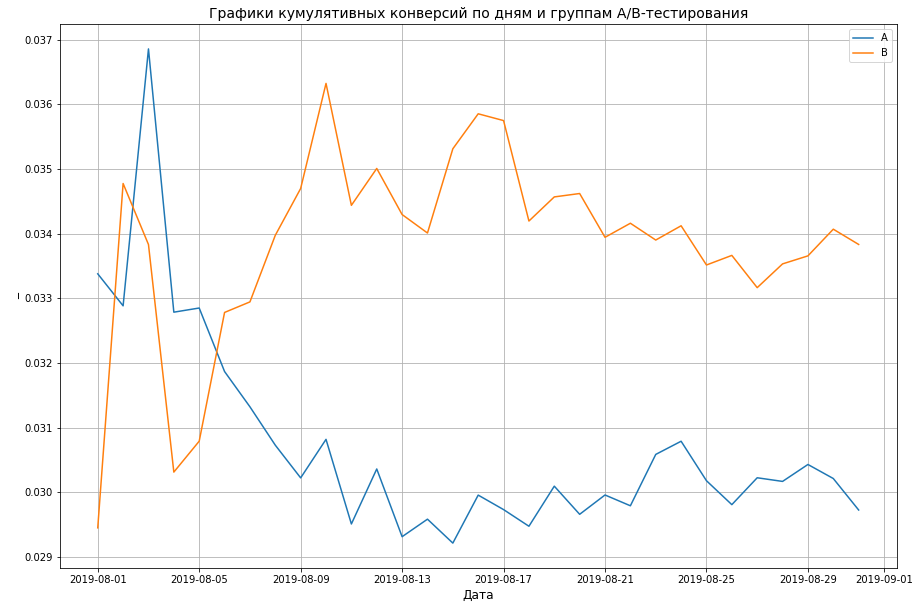

In [39]:
plt.figure(figsize=(15, 10))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.grid(visible=True)
plt.title('Графики кумулятивных конверсий по дням и группам A/B-тестирования', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('_', fontsize=12) 
plt.show();

Вывод:

- В первые дни тестирования конверсия группы А имела более высокие показатели, чем в группе В
- Однако через несколько дней (после примерно 6 августа) ситуация кардинально изменилась и конверсия группы В резко выроста, а группы А резко снизилась.
- В первые несколько дней в обеих группах конверсия имеет резкие скачки, что может быть связано с небольшим объемом данных в начале теста.
- Примерно после 6 августа, в обеих группах конверсия становится более волнообразной с небольшими, но постоянными, колебаниями. 
- Также, примерно с середины теста, разрыв между конверсиями групп становится устойчивым.

Таким образом, можно говорить о том, что кумулятивная конверсия группы В на протяжении теста более высокая, чем в группе А. Это может быть связано с удачным изменением в продукте.

###### Относительное изменение кумулятивного среднего количества заказов на посетителя группы "B" к группе "A"

Объединим кумулятивные данные в одной таблице:

In [40]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']],
       left_on='date', 
       right_on='date', 
       how='left', 
       suffixes=['A', 'B'])

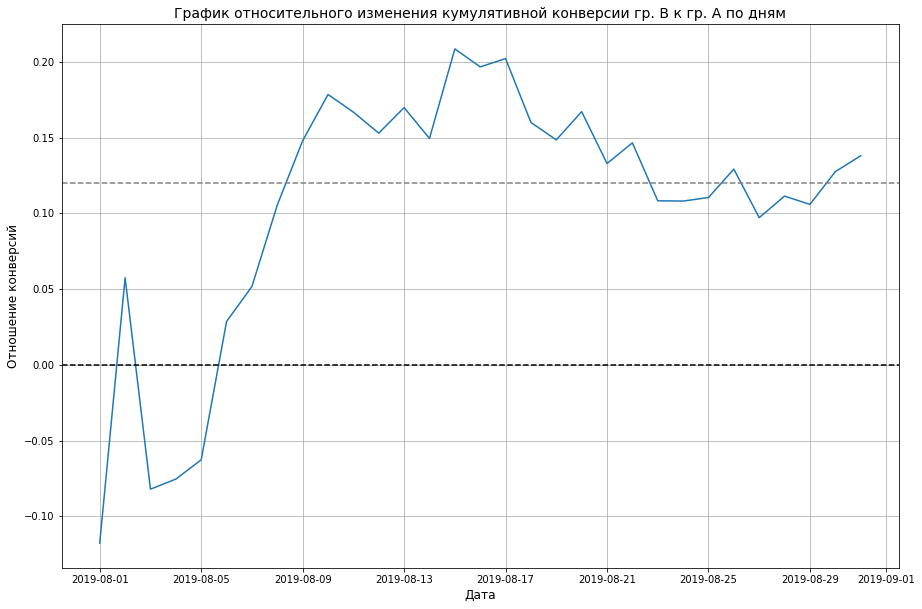

In [41]:
plt.figure(figsize=(15, 10))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии гр. B к гр. A")
plt.grid(visible=True)
plt.title('График относительного изменения кумулятивной конверсии гр. В к гр. А по дням', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Отношение конверсий', fontsize=12)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.12, color='grey', linestyle='--')
plt.show();

Вывод:

- В начале тестирования наблюдаются значительные колебания, в том числе с отрицательным отклонением, что может быть связано с недостаточным объемом данных.
- Начиная с 5 августа, относительные изменения конверсии гр. В начинают резко возрастать и к середине месяца достигают пика (примерно 20%-21%).
- Затем происходит небольшой "откат", но до конца тестирования не опускается ниже 10%. 
- При этом, колебиная волнообразные и после пика находся в диапазоне 10-20%.

В целом, конверсия группы В стабильно выше, чем у группы А и выглядит устойчиво.

##### Анализ выбросов и "всплесков"

###### Количества заказов по пользователям

In [42]:
ordersByUsers = orders_df.groupby('visitor_id', as_index=False)\
                         .agg({'transaction_id': 'nunique'})

display(ordersByUsers['transaction_id'].describe())

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: transaction_id, dtype: float64

Построим точечный график количества заказов по пользователям:

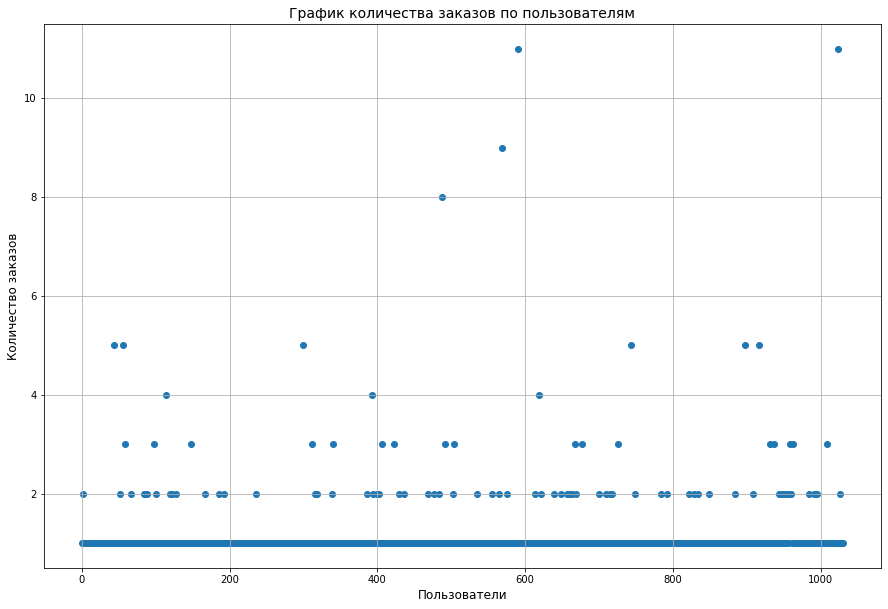

In [43]:
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(15, 10))
plt.scatter(x_values, ordersByUsers['transaction_id'])

plt.grid(visible=True)
plt.title('График количества заказов по пользователям', fontsize=14)
plt.xlabel('Пользователи', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.show();

Пользователи, которые сделали более 2 заказов встречаются редко. Согласно описательным статистикам, среднее значение количества покупок чуть более 1 раза, а медианное значение - 1 покупка.

###### Поиск "крайних" значений в количестве заказов на пользователя (95-й и 99-й перцентили)

In [44]:
display(ordersByUsers.sort_values(by='transaction_id',ascending=False).head())

,visitor_id,transaction_id
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


In [45]:
display(np.percentile(ordersByUsers['transaction_id'], [95, 99]))

array([2., 4.])

Не более 5% пользователей покупали больше 2 раз, и не более 1% пользователей - делали больше 4 покупок.

###### Стоимость заказов по пользователям

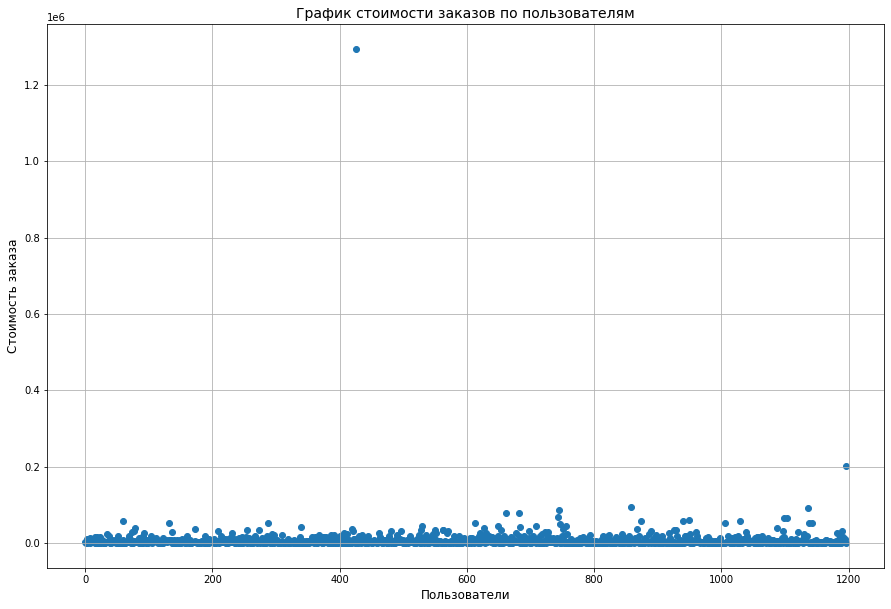

In [46]:
x_values = pd.Series(range(0, len(orders_df['revenue'])))

plt.figure(figsize=(15, 10))
plt.scatter(x_values, orders_df['revenue'])

plt.grid(visible=True)
plt.title('График стоимости заказов по пользователям', fontsize=14)
plt.xlabel('Пользователи', fontsize=12)
plt.ylabel('Стоимость заказа', fontsize=12)
plt.show();

График позволяет выявить 2 "выброса": 1 покупка более 1,2 млн.руб. и 1 покупка - около 200 тыс.руб.

Увеличим масштаб точечного гафика, ограничив значения по оси Y. Это позволит более детального увидеть распределения для основной части заказов:

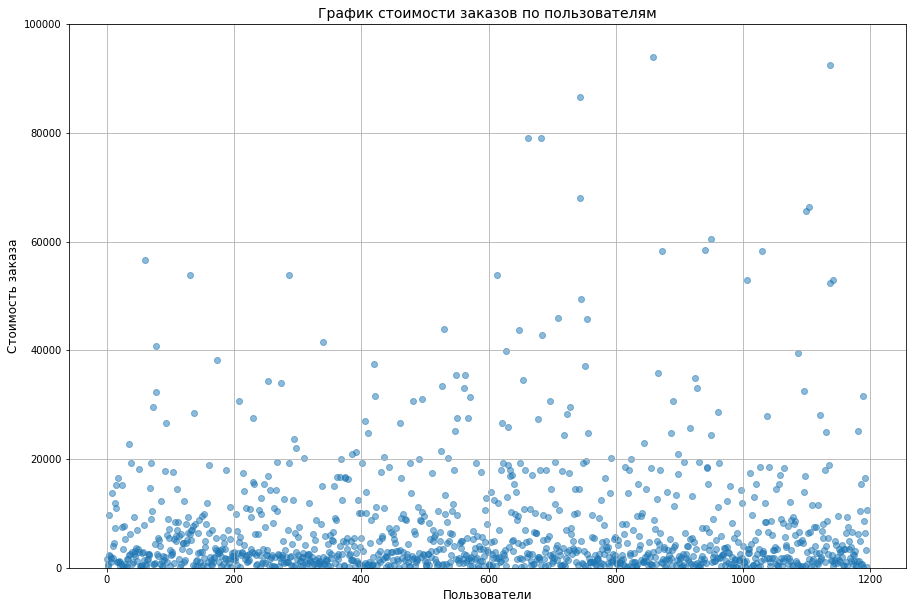

In [47]:
plt.figure(figsize=(15, 10))
plt.scatter(x_values, orders_df['revenue'], alpha=0.5)

plt.grid(visible=True)
plt.ylim(0, 100000)
plt.title('График стоимости заказов по пользователям', fontsize=14)
plt.xlabel('Пользователи', fontsize=12)
plt.ylabel('Стоимость заказа', fontsize=12)
plt.show();

Постоим гистограмму:

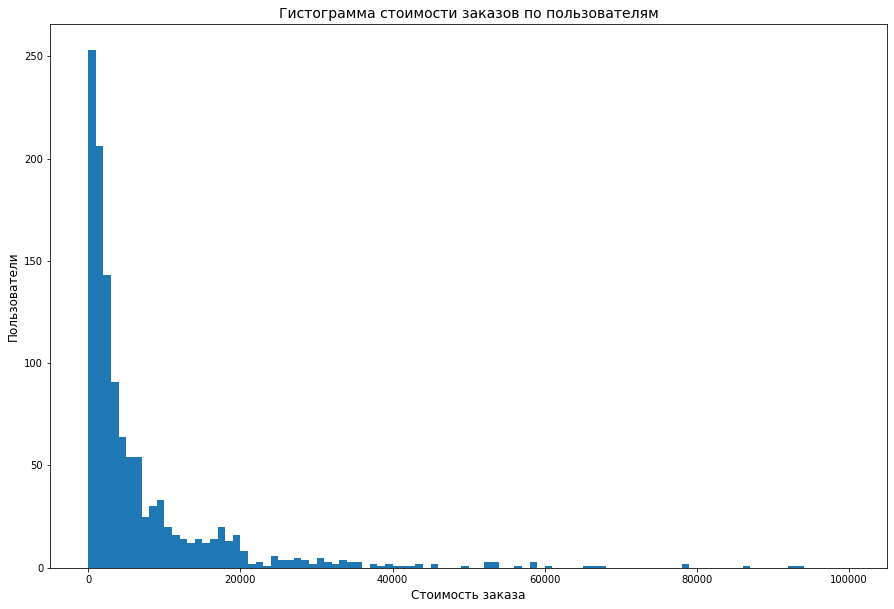

In [48]:
plt.figure(figsize=(15, 10))
plt.hist(orders_df['revenue'], range=(0,100000), bins=100)
plt.title('Гистограмма стоимости заказов по пользователям', fontsize=14)
plt.xlabel('Стоимость заказа', fontsize=12)
plt.ylabel('Пользователи', fontsize=12)
plt.show();

Визуализация данных о сумме заказов позволяет увидеть, что основная часть заказов имеют стоимость меньше 20 тыс.руб. 

###### Поиск "крайних" значений в стоимости заказов на пользователя (95-й и 99-й перцентили)

In [49]:
display(np.percentile(orders_df['revenue'], [95, 99]))

array([28000. , 58233.2])

Не более 5% пользователей совершили покупки на сумму более 28 тыс.руб, также не более 1% пользователей совершили покупки на сумму более 58 тыс.руб.

Вывод:

- К аномальным значеним можно отнести:
    - покупки одного пользователя более 2 раз,
    - стоимость заказа выше 28 тыс.руб.

##### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

###### Кумулятивные переменные и сгруппированные таблицы для анализа стат.значимости  различий в среднем количестве заказов:

- количество пользователей до выбранной даты включительно в группе A:

In [50]:
visitorsADaily = visitors_df[visitors_df['group'] == 'A'][['date', 'visitors']]

visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]\
    .agg({
        'date': 'max', 
        'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

- количество пользователей до выбранной даты включительно в группе B:

In [51]:
visitorsBDaily = visitors_df[visitors_df['group'] == 'B'][['date', 'visitors']]

visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]\
    .agg({
        'date': 'max', 
        'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)

visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

- суммарное число заказов до выбранной даты включительно в группе A:

In [52]:
ordersADaily = (
    orders_df[orders_df['group'] == 'A']\
    [['date', 
      'transaction_id', 
      'visitor_id', 
      'revenue']]\
    .groupby('date', as_index=False)\
    .agg({
        'transaction_id': pd.Series.nunique, 
        'revenue': 'sum'
    })
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']]\
    .agg({
        'date': 'max', 
        'ordersPerDateA': 'sum', 
        'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

- суммарное количество заказов до выбранной даты включительно в группе B:

In [53]:
ordersBDaily = (
    orders_df[orders_df['group'] == 'B']\
    [['date', 
      'transaction_id', 
      'visitor_id', 
      'revenue']]\
    .groupby('date', as_index=False)\
    .agg({
        'transaction_id': pd.Series.nunique, 
        'revenue': 'sum'
    })
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]\
    .agg({
        'date': 'max', 
        'ordersPerDateB': 'sum', 
        'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

- Объединим кумулятивные данные в одной таблице:

In [54]:
data = (ordersACummulative.merge(ordersBCummulative, 
               left_on='date', 
               right_on='date', 
               how='left')\
        .merge(visitorsADaily, 
               left_on='date', 
               right_on='date', 
               how='left')\
        .merge(visitorsBDaily, 
               left_on='date', 
               right_on='date', 
               how='left')\
        .merge(visitorsACummulative, 
               left_on='date', 
               right_on='date', 
               how='left')\
        .merge(visitorsBCummulative, 
               left_on='date', 
               right_on='date', 
               how='left')
)

print(data.head())

        date  ordersCummulativeA  revenueCummulativeA  ordersCummulativeB  \
0 2019-08-01                  24               148579                  21   
1 2019-08-02                  44               242401                  45   
2 2019-08-03                  68               354874                  61   
3 2019-08-04                  84               425699                  78   
4 2019-08-05                 109               549917                 101   

   revenueCummulativeB  visitorsPerDateA  visitorsPerDateB  \
0               101217               719               713   
1               266748               619               581   
2               380996               507               509   
3               489567               717               770   
4               581995               756               707   

   visitorsCummulativeA  visitorsCummulativeB  
0                   719                   713  
1                  1338                  1294  
2                  1

- `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
- `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
- `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
- `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
- `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
- `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
- `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
- `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

- число совершённых заказов пользователей в группе А, которые заказывали хотя бы 1 раз: 

In [55]:
ordersByUsersA = (orders_df[orders_df['group'] == 'A']\
                  .groupby('visitor_id', as_index=False)\
                  .agg({'transaction_id': pd.Series.nunique}))
ordersByUsersA.columns = ['userId', 'orders']

- число совершённых заказов пользователей в группе В, которые заказывали хотя бы 1 раз: 

In [56]:
ordersByUsersB = (orders_df[orders_df['group'] == 'B']\
                  .groupby('visitor_id', as_index=False)\
                  .agg({'transaction_id': pd.Series.nunique}))
ordersByUsersB.columns = ['userId', 'orders']

- Количество заказов в соответствии с пользователями в группе А (тем, кто ничего не заказал, будут соответствовать нули):

In [57]:
sampleA = pd.concat(
    [ordersByUsersA['orders'],
     pd.Series(
         0, 
         index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
         name='orders')],
    axis=0
)

- Количество заказов в соответствии с пользователями в группе В (тем, кто ничего не заказал, будут соответствовать нули):

In [58]:
sampleB = pd.concat(
    [ordersByUsersB['orders'],
     pd.Series(
         0, 
         index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
         name='orders')],
    axis=0
)

######  Статистическая значимость различия среднего количества заказов по результатам теста Манна-Уитни (по "сырым" данным").

**Сформулируем гипотезы для среднего количества заказов**:
- H₀: различий в среднем количестве заказов между группами нет.
- Ha: различия в среднем количестве заказов между группами есть.

In [59]:
alpha = 0.05

results_sampleAB = st.mannwhitneyu(sampleA, sampleB)
print('P-value для сравнения среднего количества заказов: {0:.5f}'.format(results_sampleAB.pvalue))

if results_sampleAB.pvalue < alpha:
    print('Разница в среднем количестве заказов в группах "А" и "В" статистически значима.') 
else:
    print(
        'Разница в среднем количестве заказов в группах "А" и "В" статистически НЕ значима.')

P-value для сравнения среднего количества заказов: 0.01679
Разница в среднем количестве заказов в группах "А" и "В" статистически значима.


Относительное различие в среднем количестве заказов между группами:

In [60]:
display('Относительное различие в среднем количестве заказов между группами: {0:.3f}'\
        .format(sampleB.mean() / sampleA.mean() - 1))

'Относительное различие в среднем количестве заказов между группами: 0.138'

- P-value для сравнения среднего количества заказов по "сырым" данным значительно меньше уровня значимости, в связи с этим, разницу в конверсии групп А и В можно считать статистически значимой. Отвергаем нулевую гипотезу. 
- Относительный прирост среднего количества заказов группы В к группе А составляет 13,8%.

######  Статистическая значимость различий в среднем чеке заказа между группами (по «сырым» данным).

**Сформулируем гипотезы:**
- H₀: различий в среднем чеке заказа между группами нет.
- Ha: различия в среднем чеке заказа между группами есть.

In [61]:
alpha = 0.05

results_revenueAB = st.mannwhitneyu(
    orders_df[orders_df['group']=='A']['revenue'], 
    orders_df[orders_df['group']=='B']['revenue'])


print('P-value для сравнения средних чеков: {0:.3f}'.format(results_revenueAB.pvalue))

if results_revenueAB.pvalue < alpha:
    print('Разница в среднем чеке заказа в группах "А" и "В" статистически значима.') 
else:
    print(
        'Разница в среднем чеке заказа в группах "А" и "В" статистически НЕ значима.')

P-value для сравнения средних чеков: 0.729
Разница в среднем чеке заказа в группах "А" и "В" статистически НЕ значима.


Относительное различие в среднем чеке заказа между группами:

In [62]:
print('Относительное различие в среднем чеке заказа между группами: {0:.3f}'.format(
    orders_df[orders_df['group']=='B']['revenue'].mean()\
    /orders_df[orders_df['group']=='A']['revenue'].mean()-1))

Относительное различие в среднем чеке заказа между группами: 0.259


- P-value по "сырым" данным больше уровня значимости, в связи с этим, разницу в среднем чеке между группами можно считать статистически не значимой. Не отвергаем нулевую гипотезу. 
- Относительный прирост среднего чека заказа группы В к группе А составляет 25,9%.
- Однако, прирост статистически не значим, несмотря на его величину, и поэтому может быть случаен.

##### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

###### Подготовим "очищенные" от выбросов данные. 

За основу возьмем показатели 95-го перцентиля. Таким обзаром, примем за аномалии средний чек больше 28 тыс.руб. и более 2  покупок.

In [63]:
irregul_orders = np.percentile(ordersByUsers['transaction_id'], 95).astype(int)
irregul_revenue = np.percentile(orders_df['revenue'], 95).astype(int)

In [64]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > irregul_orders]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > irregul_orders]['userId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders_df[orders_df['revenue'] > irregul_revenue]['visitor_id']

abnormalUsers = (pd.concat(
    [
        usersWithManyOrders, 
        usersWithExpensiveOrders
    ], 
    axis=0).drop_duplicates().sort_values())

display('Количество аномальных пользователей: {}'.format(abnormalUsers.shape[0]))

'Количество аномальных пользователей: 74'

 Подготовим выборки количества заказов по пользователям по группам теста:

In [65]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

###### Статистическая значимость различия среднего количества заказов по результатам теста Манна-Уитни (по "очищенным данным").

**Сформулируем гипотезы для среднего количества заказов**:
- H₀: различий в среднем количестве заказов между группами нет.
- Ha: различия в среднем количестве заказов между группами есть.

In [66]:
alpha = 0.05

results_sample_filteredAB = st.mannwhitneyu(sampleAFiltered,sampleBFiltered)
print('P-value для сравнения среднего между "очищенными" группами: {0:.3f}'.format(results_sample_filteredAB.pvalue))


if results_sample_filteredAB.pvalue < alpha:
    print('Разница в среднем в группах "А" и "В" статистически значима.') 
else:
    print(
        'Разница в среднем в группах "А" и "В" статистически НЕ значима.')

P-value для сравнения среднего между "очищенными" группами: 0.013
Разница в среднем в группах "А" и "В" статистически значима.


Относительный прирост конверсии "очищенной" группы B:

In [67]:
display('Относительный прирост конверсии "очищенной" группы B: {0:.3f}'\
        .format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

'Относительный прирост конверсии "очищенной" группы B: 0.173'

Выводы:

- Выявлено 74 пользователя с аномальными показателями стоимости и количества заказов.
- P-value для сравнения среднего количества заказов по "очищенным" данным значительно меньше уровня значимости, в связи с этим, разницу в конверсии групп А и В можно считать статистически значимой. Отвергаем нулевую гипотезу.
- Относительный прирост конверсии группы В к группе А составляет 17,3%.

###### Статистическая значимость различий в среднем чеке заказа между группами (по «очищенным» данным)

Подготовим выборки количества заказов по пользователям по группам теста:

In [68]:
sampleAFiltered = orders_df[
                np.logical_and(
                    orders_df['group'] == 'A',
                    np.logical_not(orders_df['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue']

sampleBFiltered = orders_df[
                np.logical_and(
                    orders_df['group'] == 'B',
                    np.logical_not(orders_df['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue']

**Сформулируем гипотезы:**
- H₀: различий в среднем чеке заказа между группами нет.
- Ha: различия в среднем чеке заказа между группами есть.

In [69]:
alpha = 0.05

results_revenue_filteredAB = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)
    
print('P-value для сравнения средних чеков между "очищенными" группами: {0:.3f}'.format(results_revenue_filteredAB.pvalue))

if results_revenue_filteredAB.pvalue < alpha:
    print('Разница в среднем чеке заказа в группах "А" и "В" статистически значима.') 
else:
    print(
        'Разница в среднем чеке заказа в группах "А" и "В" статистически НЕ значима.')

P-value для сравнения средних чеков между "очищенными" группами: 0.738
Разница в среднем чеке заказа в группах "А" и "В" статистически НЕ значима.


Относительный прирост среднего чека "очищенной" группы B:

In [70]:
print(
    'Относительный прирост среднего чека "очищенной" группы B: {0:.3f}'.format(
        orders_df[
            np.logical_and(
                orders_df['group'] == 'B',
                np.logical_not(orders_df['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders_df[
            np.logical_and(
                orders_df['group'] == 'A',
                np.logical_not(orders_df['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

Относительный прирост среднего чека "очищенной" группы B: -0.020


Выводы:

- P-value по "очищенным" данным больше уровня значимости, в связи с этим, разницу в среднем чеке между группами можно считать статистически не значимой. Не отвергаем нулевую гипотезу.
- Относительный прирост конверсии группы В к группе А составляет -2%. Отрицательный показатель может говорить о негативном изменении, т.е. тестируемое нами изменение привело к ухудшению конверсии в группе В (по сравнению с группой А). 
- Однако, прирост статистически не значим, и поэтому может быть случаен.

##### Выводы по анализу A/B-теста

- Несмотря на "скачки", динамика выручки обеих групп схожа, при этом рост в группе "В" во второй половине августа был более выраженным.
- Также в группе "В" более выраженный рост среднего чека (на 25%), а также средний чек был чаще выше, чем в группе "А". Однако "пик" обусловлен аномальными "выбросами". При этом, нет статистически значимого различия в группах по среднему чеку.
- Конверсия группы "В" стабильно выше (на 13%) и демонстрирует устойчивость (по "сырым" данным), что может указывать на успешность тестируемого изменения.
- Однако, для объективного анализа и принятия эффективного решения необходимо учесть выбросы и аномалии в данных. В данном исследовании аномальными были 74 наблюдения (с покупками более 2 раз и стоимостью более 28 тыс.руб.).
- По "очищенным" данным конверсия группы "В" остается стабильно высокой и устойчивой. Однако средний чек имеет отрицательный прирост, что указывает на возможное снижение выручки при тестируемом изменении. Данный показатель ставит под сомнение успешность тестируемого изменения.

Таким образом, конверсия и средний чек значительно выше в группе "В", но аномалии ("выбросы" по стоимости заказа) повлияли на результат теста. В целом, тестируемое изменение положительно повлияли на конверсию, но незначительно ухудшило средний чек, однако данное ухудшение статистически не значимо и поэтому может быть случайным. 

##### Решение по результатам теста

**Варианты решений:**

1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

- Я бы предложила остановить тест, зафиксировать победу групп "В". 
- Несмотря на то, что есть тенденция к снижению среднего чека, конверсия данной группы показывает стабильно высокий результат. 
- При этом, положительные тенденции конверсии можно зафиксировать и продолжить из реализовывать в дальнейшем. 
-  Учитывая подствержненные АВ-тестом увеличении конверсии, к приоритетным гипотезам можно в первую очередь отнести:
    - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (№6).
    - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (№2).
    - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (№0).
- Лидирующая по RICE гипотеза №7 ("Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок") напрямую не связана с увеличением конверсии и среднего чека.